In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

In [9]:
# Generate 3 random clusters with 100 points in each
num_points = 100
num_clusters = 4
X, _ = make_blobs(n_samples=num_points*num_clusters, centers=num_clusters, cluster_std=1.0)

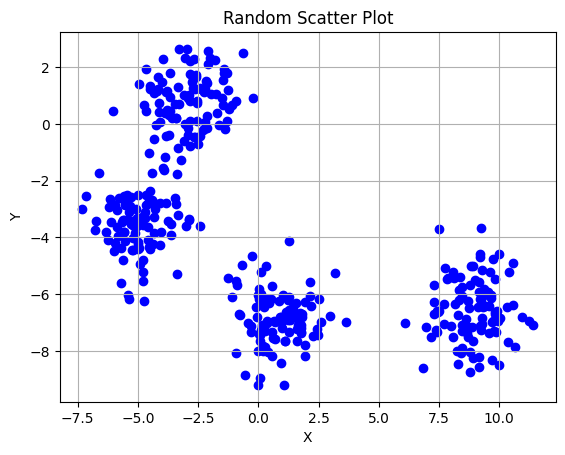

In [10]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the scatter plot using ax.scatter()
ax.scatter(X[:, 0], X[:, 1], color='blue', marker='o')

# Set the title and labels
ax.set_title('Random Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Show the grid
ax.grid(True)

In [12]:
def initialize_centers(data, num_clusters):
    # Randomly select initial cluster centers from data points
    np.random.shuffle(data)
    return data[:num_clusters]

In [13]:
def assign_clusters(data, centers):
    # Assign each data point to the closest cluster center
    clusters = []
    for point in data:
        distances = np.linalg.norm(centers - point, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

In [14]:
def update_centers(data, clusters, num_clusters):
    # Update cluster centers by taking the mean of the points assigned to each cluster
    centers = []
    for i in range(num_clusters):
        cluster_points = data[clusters == i]
        center = np.mean(cluster_points, axis=0)
        centers.append(center)
    return np.array(centers)

In [23]:
def k_means(data, num_clusters, max_iters=1000):
    # Initialize cluster centers
    centers = initialize_centers(data, num_clusters)
    
    for _ in range(max_iters):
        # Assign points to the closest cluster
        clusters = assign_clusters(data, centers)

        # Update cluster centers
        new_centers = update_centers(data, clusters, num_clusters)
        
        # Check for convergence
        if np.allclose(centers, new_centers):
            break
        
        centers = new_centers
    
    return clusters, centers

In [24]:
centers = initialize_centers(X, 4)

In [25]:
centers

array([[-5.71989964, -4.3873831 ],
       [ 1.93047544, -7.81106524],
       [ 0.67556473, -6.97434017],
       [-5.28444353, -3.5412693 ]])

In [27]:
np.argmin(np.linalg.norm(centers - X[0], axis=1))

0

In [29]:
np.argmin(np.linalg.norm(centers - X[2], axis=1)), np.linalg.norm(centers - X[2], axis=1)

(2, array([6.89886305, 1.50828039, 0.        , 6.87805743]))

In [22]:
num_clusters = 4

# Run K-means algorithm
clusters, centers = k_means(X, num_clusters)

[0 1 2 3 3 3 0 1 3 3 0 1 0 2 0 3 3 3 0 3 3 3 1 3 3 1 0 0 1 2 0 3 3 1 3 3 0
 3 0 3 0 1 3 3 3 3 3 0 2 1 0 3 3 2 3 0 3 0 3 3 3 3 1 3 3 3 3 0 1 1 0 1 3 0
 3 3 1 3 1 3 3 3 1 3 3 3 0 0 1 3 1 0 0 3 3 1 3 0 0 3 0 2 3 3 3 3 3 2 3 0 3
 0 0 3 3 1 0 0 0 3 3 3 3 3 3 0 0 1 1 2 3 0 3 3 3 3 3 3 3 0 1 3 0 1 3 3 3 0
 3 0 1 3 1 3 1 3 0 3 1 3 3 2 1 3 0 3 3 1 3 3 3 3 3 3 0 3 0 3 3 3 3 3 1 3 3
 1 3 0 0 3 0 1 1 1 0 3 1 3 0 1 2 0 1 3 0 3 3 3 0 3 2 3 3 0 0 2 3 3 0 3 3 0
 3 0 2 0 1 3 3 1 1 3 2 3 3 2 3 3 0 3 3 1 0 1 2 0 2 2 2 0 3 0 3 1 3 3 3 3 0
 3 3 1 1 2 0 1 3 0 0 3 3 3 0 3 1 3 3 1 3 3 0 2 3 3 1 3 1 1 0 0 3 1 3 0 1 1
 3 0 1 3 2 0 2 1 2 3 1 3 0 3 2 0 2 3 1 3 3 2 0 1 0 3 3 3 3 0 1 0 3 3 0 1 3
 1 3 3 3 2 1 0 3 3 0 0 3 0 3 3 0 0 0 0 1 3 3 3 1 3 3 0 0 1 3 3 0 3 0 3 3 3
 0 3 2 1 3 3 3 3 0 3 0 0 3 3 0 3 3 3 3 1 0 1 3 3 3 0 3 0 1 3]
[0 1 2 3 3 3 0 1 3 3 0 1 0 2 0 3 3 3 0 3 3 3 1 3 3 1 0 0 1 2 0 3 3 1 3 3 0
 3 0 3 0 1 3 3 3 3 3 0 2 1 0 3 3 2 3 0 3 0 3 3 3 3 1 3 3 3 3 0 1 1 0 1 3 0
 3 3 1 3 2 3 3 3 1 3 3 3 0 0 1 3 1 0 0

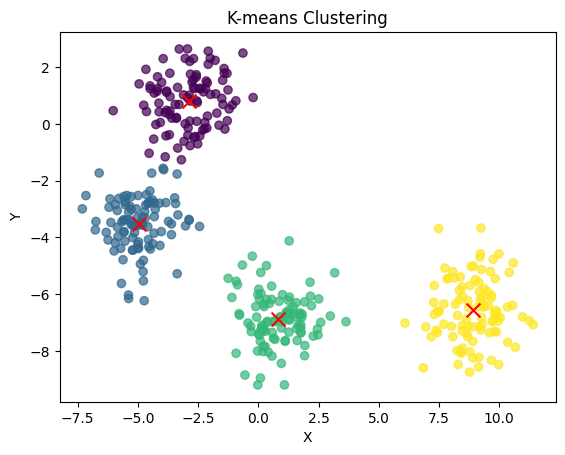

In [20]:
# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()